In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [88]:
data = pd.read_csv('amazon.csv')
data.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [89]:
data.shape

(1465, 16)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [91]:
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [92]:
data.dropna(inplace=True)
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [93]:
data.duplicated().sum()

0

In [94]:
index = data.index[data['rating'] == '|']
data.drop(index=index, inplace=True)
data.shape

(1462, 16)

In [95]:
# Replace price form string to number
data['discounted_price'] = data['discounted_price'].str.replace('₹','')
data['discounted_price'] = data['discounted_price'].str.replace(',','')
data['discounted_price'] = data['discounted_price'].astype(float)

data['actual_price'] = data['actual_price'].str.replace('₹','')
data['actual_price'] = data['actual_price'].str.replace(',','')
data['actual_price'] = data['actual_price'].astype(float)

data['discount_percentage'] = data['discount_percentage'].str.replace('%','')
data['discount_percentage'] = data['discount_percentage'].astype(int)

data['rating'] =data['rating'].astype(float)

data['rating_count'] = data['rating_count'].str.replace(',','')
data['rating_count'] = data['rating_count'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int32  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int32  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   o

In [96]:
#Scrapping the current exchange rate 
url = 'https://www.xe.com/currencyconverter/convert/?Amount=1&From=INR&To=THB'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
exchange_rate = soup.find(class_='result__BigRate-sc-1bsijpp-1 iGrAod').text
exchange_rate = float(exchange_rate.split(' ')[0])
exchange_rate

0.4144936

In [97]:
data[['discounted_price', 'actual_price']] = data[['discounted_price', 'actual_price']]*exchange_rate
data.head(7)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,165.382946,455.528466,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,82.484226,144.658266,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,82.484226,787.123346,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,136.368394,289.731026,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,63.832014,165.382946,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,61.759546,414.493600,85,3.9,24871,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,73.212005,206.832306,65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https:

In [132]:
df = data[['product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]
df.head(5)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,165.382946,455.528466,64,4.2,24269
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,82.484226,144.658266,43,4.0,43994
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,82.484226,787.123346,90,3.9,7928
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,136.368394,289.731026,53,4.2,94363
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,63.832014,165.382946,61,4.2,16905


In [133]:
df['Total_rating_score'] = df['rating'] * df['rating_count']
df = df.reset_index()
df

C:\Users\z004mbjn\AppData\Local\Temp\ipykernel_17536\3837940997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_rating_score'] = df['rating'] * df['rating_count']


,index,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,Total_rating_score
0,0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,165.382946,455.528466,64,4.2,24269,101929.8
1,1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,82.484226,144.658266,43,4.0,43994,175976.0
2,2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,82.484226,787.123346,90,3.9,7928,30919.2
3,3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,136.368394,289.731026,53,4.2,94363,396324.6
4,4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,63.832014,165.382946,61,4.2,16905,71001.0
...,...,...,...,...,...,...,...,...,...
1457,1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,157.093074,380.919618,59,4.0,1090,4360.0
1458,1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,945.045408,1262.133012,25,4.1,4118,16883.8
1459,1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",919.761298,1276.640288,28,3.6,468,1684.8
1460,1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",579.876546,783.392904,26,4.0,8031,32124.0


In [134]:
df.category.value_counts()

Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          231
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                                      

In [135]:
dict = {f"key{i}": [] for i in range(1, 3)}
for i in df['category'].tolist():
    infor =  str(i).split('|')
    dict['key1'].append(infor[0])
    dict['key2'].append(infor[-1])

In [136]:
for i in dict.keys():
    print(len(dict[i]))

1462
1462


In [137]:
df2 = pd.DataFrame(dict).rename(columns={'key1': 'Type', 'key2' : 'Name'})
df2

,Type,Name
0,Computers&Accessories,USBCables
1,Computers&Accessories,USBCables
2,Computers&Accessories,USBCables
3,Computers&Accessories,USBCables
4,Computers&Accessories,USBCables
...,...,...
1457,Home&Kitchen,WaterPurifierAccessories
1458,Home&Kitchen,Rice&PastaCookers
1459,Home&Kitchen,HeatConvectors
1460,Home&Kitchen,ExhaustFans


In [138]:
df.shape

(1462, 9)

In [139]:
df[['type', 'name']] = df2[['Type', 'Name']]
df

,index,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,Total_rating_score,type,name
0,0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,165.382946,455.528466,64,4.2,24269,101929.8,Computers&Accessories,USBCables
1,1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,82.484226,144.658266,43,4.0,43994,175976.0,Computers&Accessories,USBCables
2,2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,82.484226,787.123346,90,3.9,7928,30919.2,Computers&Accessories,USBCables
3,3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,136.368394,289.731026,53,4.2,94363,396324.6,Computers&Accessories,USBCables
4,4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,63.832014,165.382946,61,4.2,16905,71001.0,Computers&Accessories,USBCables
...,...,...,...,...,...,...,...,...,...,...,...
1457,1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,157.093074,380.919618,59,4.0,1090,4360.0,Home&Kitchen,WaterPurifierAccessories
1458,1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,945.045408,1262.133012,25,4.1,4118,16883.8,Home&Kitchen,Rice&PastaCookers
1459,1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",919.761298,1276.640288,28,3.6,468,1684.8,Home&Kitchen,HeatConvectors
1460,1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",579.876546,783.392904,26,4.0,8031,32124.0,Home&Kitchen,ExhaustFans


In [140]:
df.shape

(1462, 11)

In [141]:
df.columns

Index(['index', 'product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'Total_rating_score',
       'type', 'name'],
      dtype='object')

In [142]:
df = df.drop(columns='index')
df

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,Total_rating_score,type,name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,165.382946,455.528466,64,4.2,24269,101929.8,Computers&Accessories,USBCables
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,82.484226,144.658266,43,4.0,43994,175976.0,Computers&Accessories,USBCables
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,82.484226,787.123346,90,3.9,7928,30919.2,Computers&Accessories,USBCables
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,136.368394,289.731026,53,4.2,94363,396324.6,Computers&Accessories,USBCables
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,63.832014,165.382946,61,4.2,16905,71001.0,Computers&Accessories,USBCables
...,...,...,...,...,...,...,...,...,...,...
1457,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,157.093074,380.919618,59,4.0,1090,4360.0,Home&Kitchen,WaterPurifierAccessories
1458,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,945.045408,1262.133012,25,4.1,4118,16883.8,Home&Kitchen,Rice&PastaCookers
1459,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",919.761298,1276.640288,28,3.6,468,1684.8,Home&Kitchen,HeatConvectors
1460,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",579.876546,783.392904,26,4.0,8031,32124.0,Home&Kitchen,ExhaustFans


In [178]:
df= df.reindex(columns=['name', 'product_name', 'category', 'type', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'Total_rating_score'])
df

,name,product_name,category,type,discounted_price,actual_price,discount_percentage,rating,rating_count,Total_rating_score
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,165.382946,455.528466,64,4.2,24269,101929.8
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,82.484226,144.658266,43,4.0,43994,175976.0
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,82.484226,787.123346,90,3.9,7928,30919.2
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,136.368394,289.731026,53,4.2,94363,396324.6
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,63.832014,165.382946,61,4.2,16905,71001.0
...,...,...,...,...,...,...,...,...,...,...
1457,WaterPurifierAccessories,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Home&Kitchen,157.093074,380.919618,59,4.0,1090,4360.0
1458,Rice&PastaCookers,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen,945.045408,1262.133012,25,4.1,4118,16883.8
1459,HeatConvectors,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Home&Kitchen,919.761298,1276.640288,28,3.6,468,1684.8
1460,ExhaustFans,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Home&Kitchen,579.876546,783.392904,26,4.0,8031,32124.0


In [179]:
df.name.value_counts()

USBCables             231
SmartWatches           76
Smartphones            68
SmartTelevisions       63
In-Ear                 52
                     ... 
InternalHardDrives      1
WoodenPencils           1
BatteryChargers         1
DataCards&Dongles       1
HandheldBags            1
Name: name, Length: 207, dtype: int64

In [180]:
df.type.value_counts()

Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: type, dtype: int64

In [181]:
df.groupby('type')['Total_rating_score'].mean()

type
Car&Motorbike              4248.400000
Computers&Accessories     72423.288470
Electronics              124480.444106
Health&PersonalCare       14652.000000
Home&Kitchen              27374.243624
HomeImprovement           18628.250000
MusicalInstruments       175742.200000
OfficeProducts            20892.509677
Toys&Games                68228.100000
Name: Total_rating_score, dtype: float64

In [194]:
total_sale = df.groupby('type')['discounted_price'].sum()
total_sale.values.astype(int)
total_sale = total_sale.apply(lambda x: int(x))
total_sale.sort_values(ascending=False)
#sns.barplot(data= total_sale, x= 'type')

type
Electronics              1300704
Home&Kitchen              431909
Computers&Accessories     158035
OfficeProducts              3875
Car&Motorbike                969
MusicalInstruments           528
Health&PersonalCare          372
HomeImprovement              279
Toys&Games                    62
Name: discounted_price, dtype: int64

C:\Users\z004mbjn\AppData\Local\Temp\ipykernel_17536\3410357327.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000'),
 Text(0, 1400000.0, '1,400,000')]

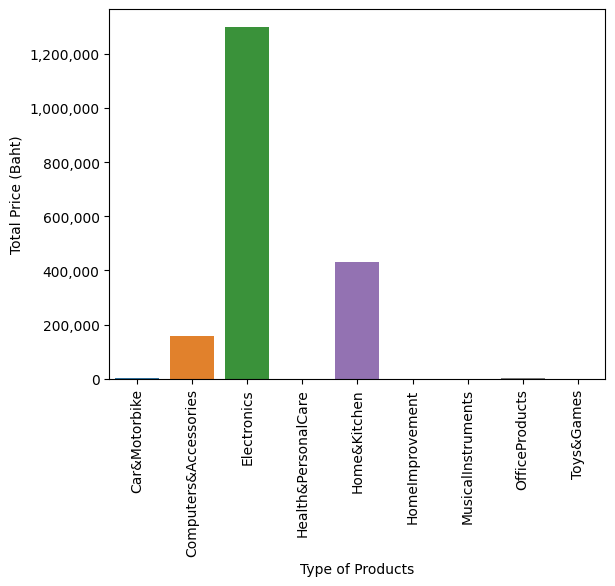

In [228]:
from matplotlib.ticker import ScalarFormatter
sns.barplot(x= total_sale.index, y = total_sale.values)
plt.xlabel("Type of Products",fontsize=10)
plt.ylabel("Total Price (Baht)",fontsize=10)
plt.xticks(rotation = 90)

# Get current axis object
ax = plt.gca()

# Set formatter for y-axis labels
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.offsetText.set_visible(False)

# Set y-axis tick labels
ticks = ax.get_yticks()
labels = [f"{int(tick):,}" for tick in ticks]
ax.set_yticklabels(labels)

In [199]:
avg_dis = df.groupby('type')['discount_percentage'].mean()
avg_dis.sort_values(ascending=False)

type
HomeImprovement          57.500000
Computers&Accessories    53.920177
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.174497
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64

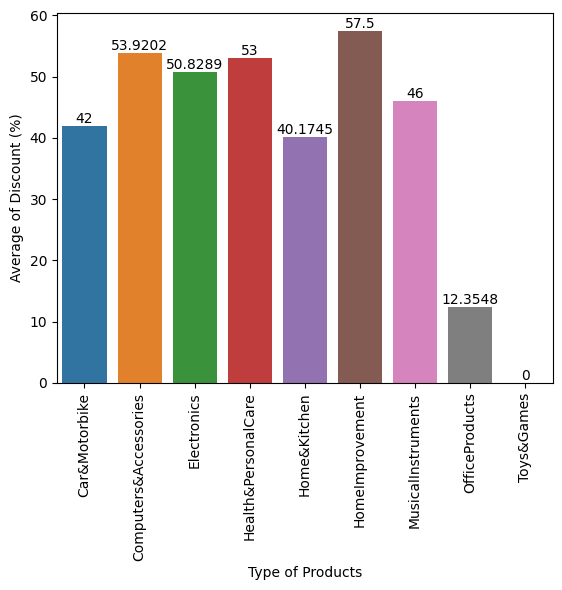

In [229]:
ax = sns.barplot(x= avg_dis.index, y = avg_dis.values)
plt.xlabel("Type of Products",fontsize=10)
plt.ylabel("Average of Discount (%)",fontsize=10)
plt.xticks(rotation = 90)

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=0)

C:\Users\z004mbjn\AppData\Local\Temp\ipykernel_17536\2369035279.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 3500000.0, '3,500,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 4500000.0, '4,500,000')]

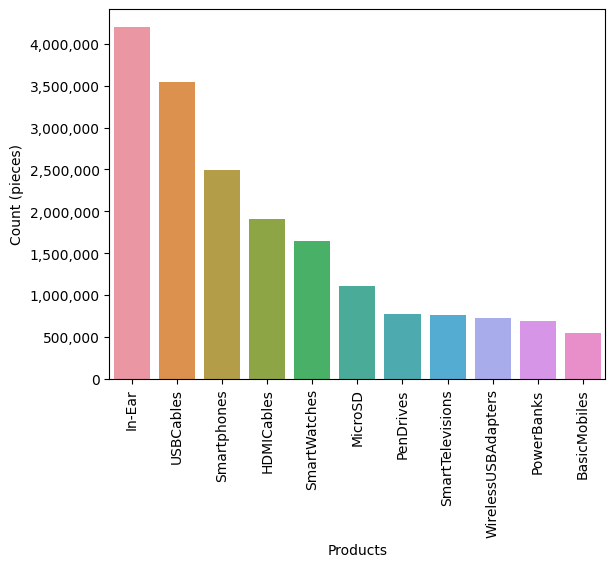

In [230]:
top_sell = df.groupby('name')['rating_count'].sum().sort_values(ascending=False)
ax = sns.barplot(x= top_sell.index[:11], y= top_sell.values[:11])
plt.xlabel("Products",fontsize=10)
plt.ylabel("Count (pieces)",fontsize=10)
plt.xticks(rotation = 90)

# Get current axis object
ax = plt.gca()

# Set formatter for y-axis labels
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.offsetText.set_visible(False)

# Set y-axis tick labels
ticks = ax.get_yticks()
labels = [f"{int(tick):,}" for tick in ticks]
ax.set_yticklabels(labels)


Text(0, 0.5, 'Discount (%)')

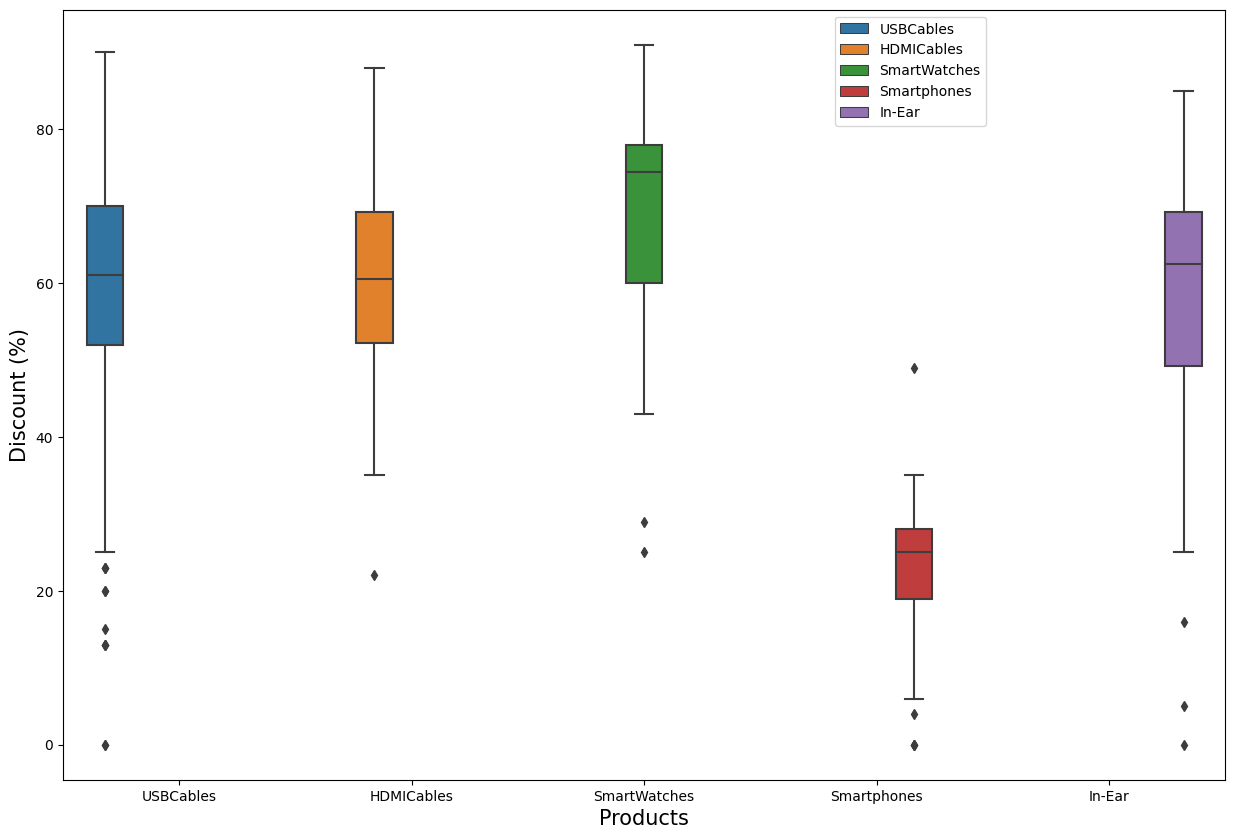

In [279]:
discount_top5 = df.loc[(df['name'] == 'In-Ear') | (df['name'] == 'USBCables') | (df['name'] == 'Smartphones') | (df['name'] == 'HDMICables') | (df['name'] ==  'SmartWatches')]
#sns.scatterplot(data= discount_top5, x='name', y='discount_percentage')
# Create a figure and axis object
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(15, 10)

ax = sns.boxplot(data= discount_top5, x = 'name', y = 'discount_percentage', hue='name')
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1))
plt.xlabel("Products",fontsize=15)
plt.ylabel("Discount (%)",fontsize=15)

In [285]:
COM_data = df.loc[df['type'] == 'Computers&Accessories']
COM_data.groupby('name')['rating_count'].sum().sort_values(ascending=False)[:11]


name
USBCables                   3547816
PenDrives                    774744
WirelessUSBAdapters          727113
Mice                         407289
Routers                      311801
Repeaters&Extenders          222371
ExternalHardDisks            213112
Keyboard&MouseSets           161991
Lapdesks                     107177
Keyboards                    104394
InternalSolidStateDrives      98469
Name: rating_count, dtype: int32

In [284]:
Elec_data = df.loc[df['type'] == 'Electronics']
Elec_data.groupby('name')['rating_count'].sum().sort_values(ascending=False)[:11]

name
In-Ear               4204939
Smartphones          2493269
HDMICables           1906054
SmartWatches         1644476
MicroSD              1113592
SmartTelevisions      760279
PowerBanks            688810
BasicMobiles          550259
On-Ear                542870
BluetoothSpeakers     185268
DomeCameras           148848
Name: rating_count, dtype: int32